# Simulator PV and unavaibility 

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.9.0
- Date : 07-08-2022 

In [28]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# paths
file_path_gen = '../../Data/Real_Generations_Data/'
file_path_func = '../../Functions/'

# functions AND system photovoltaic
import sys
sys.path.append(file_path_gen)
sys.path.append(file_path_func)

import functions as func
import imp
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook

import bokeh as boken
from bokeh.plotting import figure, output_file, show
import bokeh.palettes as bkpalet #from bokeh.palettes import PuOr
import bokeh.transform as bktrans # from bokeh.transform import cumsums

## 1) Data_real

In [29]:
# read pickle
file_name = 'Real_Generations'
file_ext = 'xlsx'
data_pickle = func.data_to_pickle(file_path_gen,file_name,file_ext)

- Tried to read file picke: ../../Data/Real_Generations_Data/Real_Generations.pickle
ERROR1: pickle NOT found in path: ../../Data/Real_Generations_Data/Real_Generations.pickle
- Tried to read file: ../../Data/Real_Generations_Data/Real_Generations.xlsx
    Read file
- Trying to generate pickle
    Pickle generated
- Trying to read generated pickle
    Pickle read on:  ../../Data/Real_Generations_Data/Real_Generations.pickle
Returning data


In [30]:
data_pickle

,Central,Llave,Grupo reporte,Tipo,Subtipo,Fecha,año,mes,día,Hora 1,...,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23,Hora 24,Total,Unnamed: 34
0,HE ANGOSTURA,ANGOSTURA,Angostura,Hidráulica,Pasada,2017-01-01,NaN,NaN,NaN,41.0,...,38.000000,38.000000,39.000000,38.000000,38.000000,38.0,38.0,40.0,936.000000,NaN
1,HE ANGOSTURA,ANGOSTURA,Angostura,Hidráulica,Pasada,2017-01-02,NaN,NaN,NaN,40.0,...,38.000000,38.000000,39.000000,38.000000,38.000000,38.0,38.0,38.0,923.000000,NaN
2,HE ANGOSTURA,ANGOSTURA,Angostura,Hidráulica,Pasada,2017-01-03,NaN,NaN,NaN,39.0,...,38.000000,38.000000,38.000000,38.000000,39.000000,38.0,38.0,39.0,917.000000,NaN
3,HE ANGOSTURA,ANGOSTURA,Angostura,Hidráulica,Pasada,2017-01-04,NaN,NaN,NaN,38.0,...,36.000000,34.000000,34.000000,35.000000,34.000000,36.0,40.0,38.0,897.000000,NaN
4,HE ANGOSTURA,ANGOSTURA,Angostura,Hidráulica,Pasada,2017-01-05,NaN,NaN,NaN,38.0,...,38.000000,38.000000,39.000000,40.000000,41.000000,42.0,42.0,43.0,928.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748249,PMGD PFV ÑIQUEN,Niquen,Solar Ñiquén,Solar,Solar,2021-12-27,2021.0,12.0,27.0,0.0,...,1.441870,0.335591,1.957943,1.104650,0.083487,0.0,0.0,0.0,19.726594,NaN
748250,PMGD PFV ÑIQUEN,Niquen,Solar Ñiquén,Solar,Solar,2021-12-28,2021.0,12.0,28.0,0.0,...,0.243448,1.984714,1.618137,0.302857,0.128278,0.0,0.0,0.0,20.118538,NaN
748251,PMGD PFV ÑIQUEN,Niquen,Solar Ñiquén,Solar,Solar,2021-12-29,2021.0,12.0,29.0,0.0,...,0.253951,0.131320,0.150558,0.077713,0.027323,0.0,0.0,0.0,3.298914,NaN
748252,PMGD PFV ÑIQUEN,Niquen,Solar Ñiquén,Solar,Solar,2021-12-30,2021.0,12.0,30.0,0.0,...,0.000000,0.263868,1.942412,1.107270,0.157821,0.0,0.0,0.0,19.243519,NaN


## 2) Graph_per_hour

In [31]:
# names to seach
names_pv = ['PMGD PFV EL GUANACO SOLAR',
            'PMGD PFV PUENTE SOLAR',
            'PMGD PFV CITRINO']

In [32]:
# find hourly logs for each name
data_hours = func.filter_hour_from_dataFrame(data=data_pickle,
                                      #columns_names=[],
                                      #column_fecha='Fecha'
                                      #column_central='Central',
                                      first_year=2021,
                                      last_year=2021,
                                      names_pv=names_pv,
                                      months=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      p = False)

- Using default  ['Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23', 'Hora 24'] for columns_names 

- Using default Fecha for column_fecha 

- Using default Central for column_central 



In [33]:
umbral = 0
registro, indisp_total = func.indisponibilidad(data=data_hours,r_start=9,r_end=18,umbral=umbral,print_=True)

/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:685: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  indisp_total[pl][f+f.freq*1] = data[pl][f+f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:686: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  r[pl][f.date()][f.hour+1] = data[pl][f+f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:687: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  indisp_total[pl][f-f.freq*1] = data[pl][f-f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:688: FutureWarning: Timestamp.freq is deprecate

Indiponibilidad para:  PMGD PFV EL GUANACO SOLAR
   -  f: 2021-01-06, h: 10, 11, 12, 
   -  f: 2021-01-30, h: 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
   -  f: 2021-01-31, h: 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
   -  f: 2021-02-01, h: 8, 9, 10, 11, 12, 
   -  f: 2021-02-11, h: 11, 12, 13, 14, 
   -  f: 2021-02-18, h: 8, 9, 10, 11, 12, 13, 14, 
   -  f: 2021-03-19, h: 14, 15, 16, 
   -  f: 2021-04-23, h: 17, 18, 19, 
   -  f: 2021-05-01, h: 17, 18, 19, 
   -  f: 2021-05-06, h: 17, 18, 19, 
   -  f: 2021-05-10, h: 17, 18, 19, 
   -  f: 2021-05-11, h: 17, 18, 19, 
   -  f: 2021-05-12, h: 17, 18, 19, 
   -  f: 2021-05-13, h: 17, 18, 19, 
   -  f: 2021-05-14, h: 17, 18, 19, 
   -  f: 2021-05-17, h: 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
   -  f: 2021-05-18, h: 17, 18, 19, 
   -  f: 2021-05-19, h: 17, 18, 19, 
   -  f: 2021-05-20, h: 17, 18, 19, 
   -  f: 2021-05-21, h: 8, 9, 10, 11, 12, 17, 18, 19, 
   -  f: 2021-05-22, h: 17, 18, 19, 
   -  f: 2021-05-23, h: 12, 13

<IPython.core.display.Javascript object>


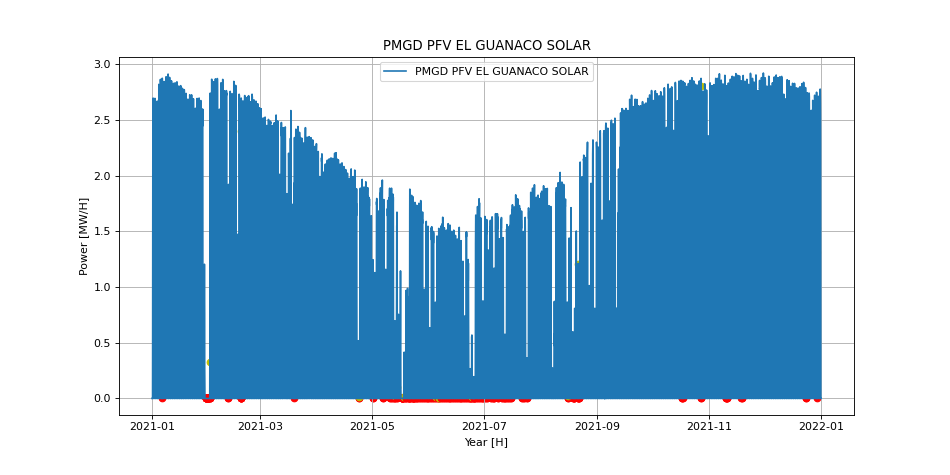

PMGD PFV EL GUANACO SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


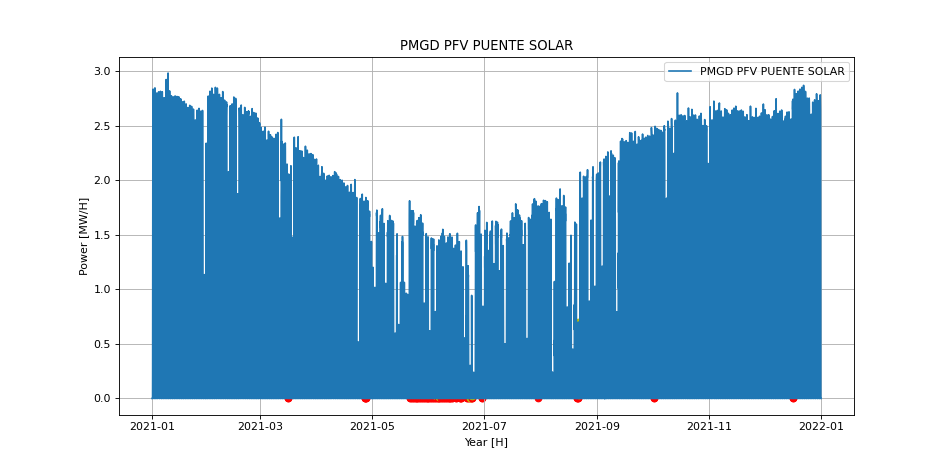

PMGD PFV PUENTE SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


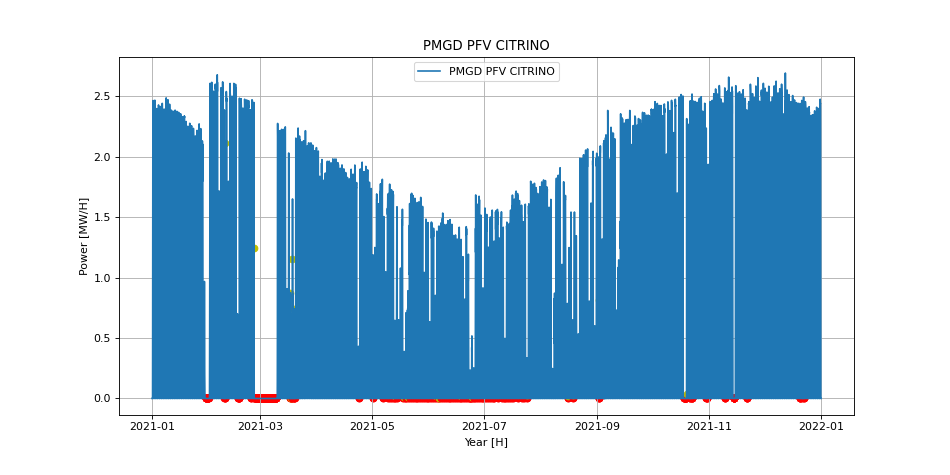

PMGD PFV CITRINO len: 8760
x 8760
y 8760


In [34]:
func.graph2(data=data_hours,
       x_label= 'Year [H]',
       y_label='Power [MW/H]',
       name='hour',
       indisp=indisp_total,
       umbral = umbral,
       size=40,
       dark=False)

long axis x = 8760


<IPython.core.display.Javascript object>


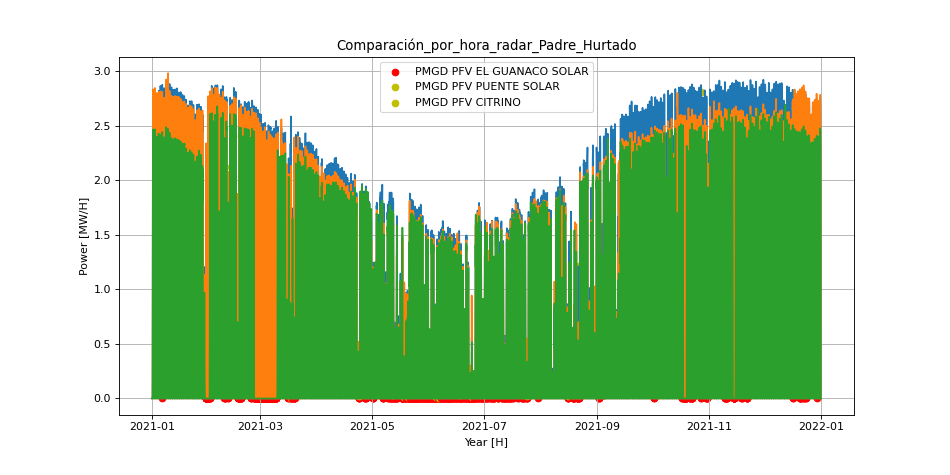

In [35]:
# colores:
# https://docs.bokeh.org/en/latest/docs/reference/colors.html
func.multi_graph_png_html2(data=data_hours,
                      x_label= 'Year [H]',
                      y_label='Power [MW/H]',
                      name='Comparación_por_hora_radar_Padre_Hurtado',
                      colors=['cornflowerblue','darkorange','green','purple','olive'],
                      indisp=indisp_total,
                      umbral = umbral,
                      size=40,
                      dark=True)